In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
del_time = pd.read_csv('C:/Users/oyedeepak/Downloads/Assignment/Simple Linear Regression/delivery_time.csv')

In [3]:
del_time.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [4]:
del_time.rename(columns = {'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'}, inplace = True)
del_time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

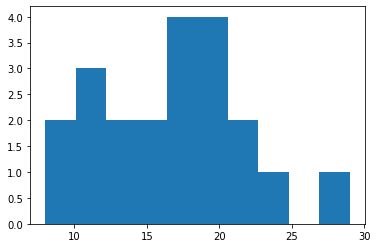

In [5]:
plt.hist(del_time.delivery_time)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

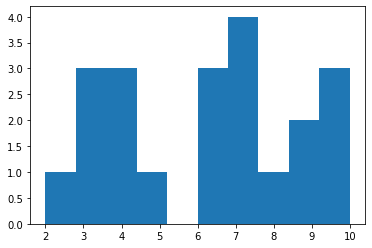

In [6]:
plt.hist(del_time.sorting_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8340cb808>,
 'caps': [<matplotlib.lines.Line2D at 0x1d834117f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d834111b88>],
 'medians': [<matplotlib.lines.Line2D at 0x1d83411bf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d834122dc8>],
 'means': []}

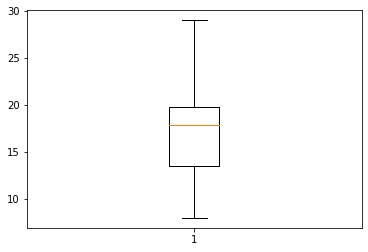

In [7]:
plt.boxplot(del_time.delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d8340d9b08>,
 'caps': [<matplotlib.lines.Line2D at 0x1d834182fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d83417e608>],
 'medians': [<matplotlib.lines.Line2D at 0x1d834187f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d834187cc8>],
 'means': []}

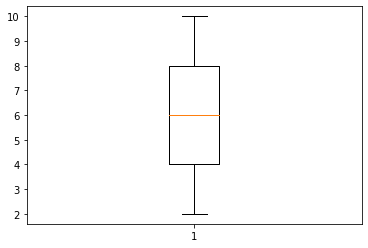

In [8]:
plt.boxplot(del_time.sorting_time)

In [9]:
del_time.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [10]:
del_time.delivery_time.corr(del_time.sorting_time)

0.8259972607955326

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=del_time).fit()
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.98e-06
Time:                        16:06:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.conf_int(0.05) # 95% confidence interval


,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [14]:
pred = model.predict(del_time)

Text(0, 0.5, 'Delivery time')

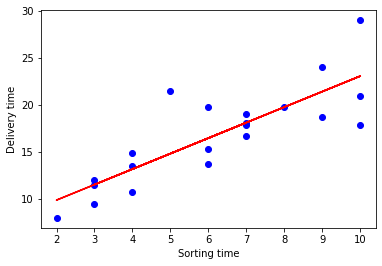

In [15]:
plt.scatter(x=del_time['sorting_time'], y = del_time['delivery_time'], color = 'blue')
plt.plot(del_time['sorting_time'], pred, color = 'red')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [16]:
pred.corr(del_time.delivery_time)

0.8259972607955325

In [17]:
model2 = smf.ols('delivery_time~np.log(sorting_time)', data=del_time).fit()
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.64e-06
Time:                        16:06:13   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2.conf_int(0.95)

,0,1
Intercept,1.003720,1.315647
np.log(sorting_time),8.956175,9.130652


In [20]:
pred2 = model2.predict(del_time)

Text(0, 0.5, 'Delivery time')

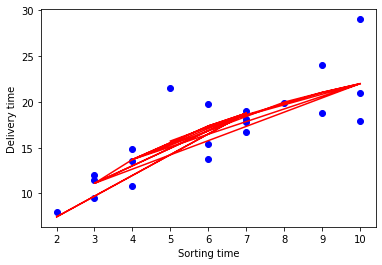

In [21]:
plt.scatter(x=del_time['sorting_time'], y = del_time['delivery_time'], color = 'blue')
plt.plot(del_time['sorting_time'], pred2, color = 'red')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [22]:
model3 = smf.ols('(delivery_time)~np.log(sorting_time)', data=del_time).fit()
model3.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [23]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.64e-06
Time:                        16:06:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print(model3.conf_int(0.01)) 

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


In [25]:
pred3 = model3.predict(del_time)
pred3.corr(del_time.delivery_time)

0.8339325279256244

In [26]:
pred3.head(5)

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

Text(0, 0.5, 'Delivery time')

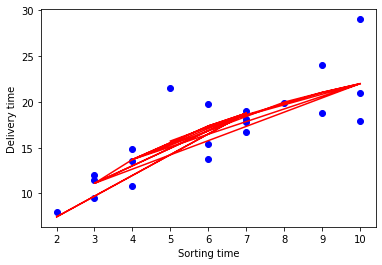

In [27]:
plt.scatter(x=del_time['sorting_time'], y = del_time['delivery_time'], color = 'blue')
plt.plot(del_time['sorting_time'], pred3, color = 'red')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [28]:
# quadratic model

In [29]:
del_time['sorting_time_sq'] = del_time.sorting_time*del_time.sorting_time
model_quad = smf.ols('delivery_time~sorting_time+sorting_time_sq', data = del_time).fit()

In [30]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.39e-05
Time:                        16:06:16   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
sorting_time        2.8130      1.461      1.926      0.070      -0.256       5.882
sorting_time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
from sklearn.model_selection import train_test_split

del_time_train, del_time_test = train_test_split(del_time, test_size = 0.2)

model_train = smf.ols('delivery_time~np.log(sorting_time)', data = del_time).fit()

train_pred = model_train.predict(del_time_train)

train_resid = train_pred - del_time_train.delivery_time

del_time_train.head()

,delivery_time,sorting_time,sorting_time_sq
11,10.75,4,16
18,8.00,2,4
5,15.35,6,36
16,13.75,6,36
13,11.50,3,9


In [32]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

2.2924848268092743

In [33]:
test_pred = model_train.predict(del_time_test)

test_resid  = test_pred - del_time_test.delivery_time

test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

3.8154152026091466

In [34]:
import statsmodels.formula.api as smf
modelsq=smf.ols("delivery_time~np.sqrt(sorting_time)",data=del_time).fit()
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [35]:
modelsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.61e-06
Time:                        16:06:25   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
predsq = modelsq.predict(del_time)
predsq.corr(del_time.delivery_time)

0.8341500030755062

Text(0, 0.5, 'Delivery time')

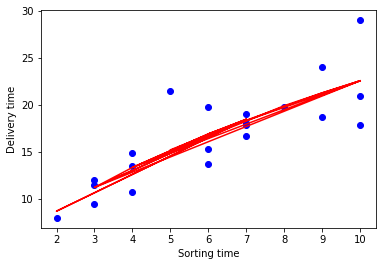

In [37]:
plt.scatter(x=del_time['sorting_time'], y = del_time['delivery_time'], color = 'blue')
plt.plot(del_time['sorting_time'], predsq, color = 'red')
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')